## Titanic Datset
## Predict passenger's survival in titanic accident, given the passenger attributes.

In [1]:
from sklearn.datasets import fetch_openml
d  = fetch_openml(name="Titanic", as_frame=True, version=1)
df = d["frame"]
print(d['DESCR'])

**Author**: Frank E. Harrell Jr., Thomas Cason  
**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  
**Please cite**:   

The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

Thomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variable

In [2]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


### Features description

* pclass    Class (1 = First, 2 = Second, 3 = Third)
* survived  (0 = died, 1 = survived)
* name
* sex
* age
* sibsp (Number of siblings/spouses on board)
* parch (Number of parents/children on board)
* ticket (Ticket Number)
* fare  (Price of the ticket)
* cabin (Cabin Number)
* embarked (Place where passeneger embarked C = Cherbourg; Q = Queenstown; S = Southampton)
* boat (Lifeboat ID if passenger was rescued)
* body (Body ID if passenger died and body was recovered)
* home.dest (Passenger Hometown)

Types of features 
* Categorical (Number or Text)
    * Ordinal
    * Nominal
* Numerical
* Text
    
TBD: What is the type for following features. (choose from above)
* name - Text
* sex - Categorical Nominal
* age - Number
* ticket - Number
* embarked (port of embarkment) - Categorical Nominal
* survived - Number (Boolean)
* parch (number of parents/children aboard) - Number



### Missing Data
### TBD Which features in Titanic dataset have missing data

- Weight (Number)
- Occupation (Text)
- Highest Level of Education (None/Higher/Further/Undergrad/Postgrad)
- Relationship Status (S/R/M/na)
- Underlying Health Conditions (Y/N)

## ML Ready: Is data ready to be fed to a classification problem?
## TBD: What are 3 main issues that needs to be resolved in data?

- Missing data either needs to be imputed or removed
- Text data either needs to be vectorized or removed if not relevant
- Categorical data needs to be encoded

In [3]:
import pandas as pd

def cleaner(df):
  for col_name in df.columns:    
      if df[col_name].dtype.name == 'category': 
        # Convert categorical types
        df[col_name] = df[col_name].cat.codes
      if df[col_name].dtype.name == 'object':
        df = df.drop(columns=[col_name])
  return df

def titanic_cleaner(df):
    df = df.drop(columns = ['body']) 
    return df.dropna()

#TBD Using above 2 naive cleaner functions clean the titanic dataframe
df = cleaner(df)
df = titanic_cleaner(df)
df.head(5)


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1,0,29.0000,0.0,0.0,211.3375,2
1,1.0,1,1,0.9167,1.0,2.0,151.5500,2
2,1.0,0,0,2.0000,1.0,2.0,151.5500,2
3,1.0,0,1,30.0000,1.0,2.0,151.5500,2
4,1.0,0,0,25.0000,1.0,2.0,151.5500,2


## TBD Split the data into train test (test_size=0.25, random_state=101)

In [4]:
from sklearn.model_selection import train_test_split

Y = df['survived']
X = df.drop('survived', axis=1)

In [5]:
X.head(5)

,pclass,sex,age,sibsp,parch,fare,embarked
0,1.0,0,29.0000,0.0,0.0,211.3375,2
1,1.0,1,0.9167,1.0,2.0,151.5500,2
2,1.0,0,2.0000,1.0,2.0,151.5500,2
3,1.0,1,30.0000,1.0,2.0,151.5500,2
4,1.0,0,25.0000,1.0,2.0,151.5500,2


In [6]:
Y.head(5)

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int8

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.25, random_state=101)

## TBD Apply Logistic Regression 

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def run_model(model):
    model.fit(X_train, Y_train)

    Y_hat = model.predict(X_test)
    #TBD Accuracy Score on test set
    print('Model Score: ' + str(accuracy_score(Y_test, Y_hat)))

lr = LogisticRegression()
run_model(lr)

Model Score: 0.7908163265306123


## What are the top 3 most important features for predicting survival?


In [64]:
def feature_strength(model):
    a = X.columns.to_numpy()
    b = model.coef_[0]

    import matplotlib.pyplot as plt
    plt.scatter(a, b)
    plt.title(model)
    plt.ylabel('Weighting')
    plt.show()

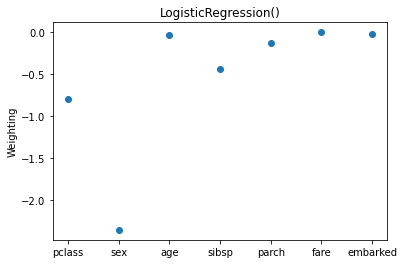

In [65]:
feature_strength(lr)

In [67]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
run_model(knn)

Model Score: 0.639030612244898


In [68]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
run_model(rfc)

Model Score: 0.7474489795918368
